# Going Deeper 06
## ÌîÑÎ°úÏ†ùÌä∏ : End-to-End OCR

### ÌîÑÎ°úÏ†ùÌä∏ Íµ¨ÏÑ±
1. Recognition model
    - (1) Recognition model
    - (2) Input Image
    - (3) Encode
    - (4) Build CRNN model
    - (5) Train & Inference
2. ÌîÑÎ°úÏ†ùÌä∏ : End-to-End OCR
3. Í≤∞Í≥º Ï†ïÎ¶¨

### ÌîÑÎ°úÏ†ùÌä∏ Î™©Ìëú
1. Text recognitionÏùÑ ÏúÑÌï¥ ÌäπÌôîÎêú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏßÑÌñâ
    - ÌÖçÏä§Ìä∏ Ïù¥ÎØ∏ÏßÄ Î¶¨ÏÇ¨Ïù¥Ïßï, ctc loss Ï∏°Ï†ïÏùÑ ÏúÑÌïú ÎùºÎ≤® Ïù∏ÏΩîÎî©, Î∞∞Ïπò Ï≤òÎ¶¨ ÏàòÌñâ
2. CRNN Í∏∞Î∞òÏùò recognition Î™®Îç∏Ïùò ÌïôÏäµÏù¥ Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÏßÑÌñâ
    - ÌïôÏäµÍ≤∞Í≥º lossÍ∞Ä ÏïàÏ†ïÏ†ÅÏúºÎ°ú Í∞êÏÜåÌïòÍ≥† ÎåÄÎ∂ÄÎ∂ÑÏùò Î¨∏ÏûêÏù∏Ïãù Ï∂îÎ°† Í≤∞Í≥ºÎ•º Ï†ïÌôïÌïòÍ≤å Ïù∏Ïãù
3. keras-ocr detectorÏôÄ CRNN recognizerÎ•º ÏóÆÏñ¥ ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÏûÖÎ†•ÏúºÎ°úÎ∂ÄÌÑ∞ textÍ∞Ä Ï∂úÎ†•ÎêòÎäî OCRÏù¥ End-to-EndÎ°ú Íµ¨ÏÑ±
    - ÏÉòÌîå Ïù¥ÎØ∏ÏßÄÎ•º ÏõêÎ≥∏ÏúºÎ°ú Î∞õÏïÑ OCR ÏàòÌñâ Í≤∞Í≥ºÎ•º Î¶¨ÌÑ¥ÌïòÎäî 1Í∞úÏùò Ìï®ÏàòÍ∞Ä ÎßåÎì§Ïñ¥Ïßê

In [1]:
import os

path = os.path.join(os.getenv('HOME'),'aiffel/ocr')
os.chdir(path)

print(path)

/aiffel/aiffel/ocr


# Recognition model (1)

Recognition modelÏùÄ 2015ÎÖÑÏóê Î∞úÌëúÎêú CRNN Íµ¨Ï°∞Î•º ÌôúÏö©Ìï¥ÏÑú ÎßåÎì§ ÏòàÏ†ïÏûÖÎãàÎã§.

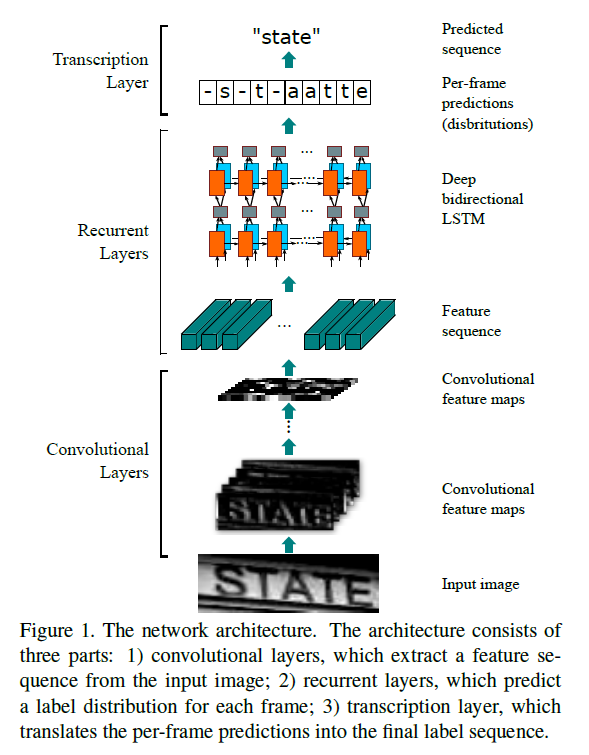
Ï∂úÏ≤ò: [Ìï¥Îãπ ÎÖºÎ¨∏](https://arxiv.org/pdf/1507.05717.pdf)

CRNNÏùò Íµ¨Ï°∞Î•º ÏÇ¥Ìé¥Î≥¥Í∏∞ ÏúÑÌï¥ ÏïÑÎûò Input imageÎ∂ÄÌÑ∞ Î≥¥Î©¥ Îê©ÎãàÎã§. ÏûÖÎ†• Ïù¥ÎØ∏ÏßÄÎ•º Conv layerÎ•º ÌÜµÌï¥ FeatureÎ•º Ï∂îÏ∂úÌïòÏó¨ featureÎ•º ÏñªÏñ¥ÎÉÖÎãàÎã§.

Recurrent LayersÎäî Ï∂îÏ∂úÎêú featureÏùò Ï†ÑÏ≤¥ contextÎ•º ÌååÏïÖÌïòÍ≥† Îã§ÏñëÌïú output ÌÅ¨Í∏∞Ïóê ÎåÄÏùëÏù¥ Í∞ÄÎä•Ìï©ÎãàÎã§.

ÎßàÏßÄÎßâÏúºÎ°ú Transcription layer(Fully connected layer)Îäî stepÎßàÎã§ Ïñ¥Îñ§ characterÏùò ÌôïÎ•†Ïù¥ ÎÜíÏùÄÏßÄ ÏòàÏ∏°Ìï©ÎãàÎã§.

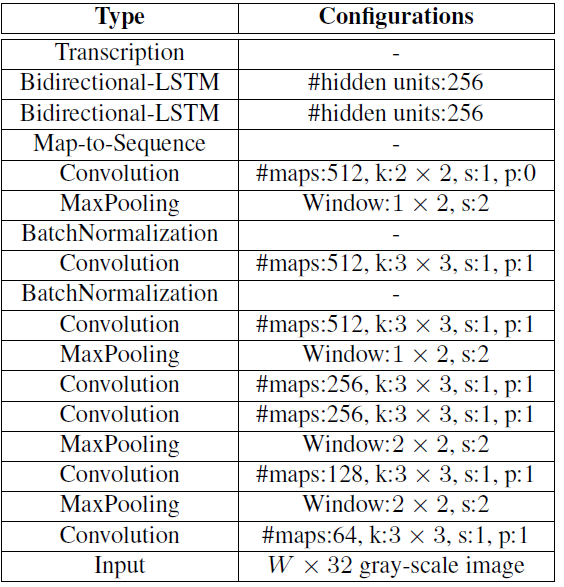

Ï†ÑÏ≤¥ Íµ¨Ï°∞Îäî ÏúÑÏôÄ Í∞ôÏäµÎãàÎã§.

In [2]:
NUMBERS = "0123456789"
ENG_CHAR_UPPER = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
TARGET_CHARACTERS = ENG_CHAR_UPPER + NUMBERS
print(f"The total number of characters is {len(TARGET_CHARACTERS)}")

The total number of characters is 36


lmdbÎ•º Ïù¥Ïö©Ìï† ÏòàÏ†ïÏûÖÎãàÎã§. LMDBÎäî SymasÏóêÏÑú ÎßåÎì† Lightning Memory-Mapped DatabaseÏùò ÏïΩÏûêÏù¥Î©∞, Îã§Î£®Í≤å Îê† datasetÏù¥ lmdb Ìè¨Îß∑(mdb) ÌååÏùºÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏäµÎãàÎã§.

In [3]:
# ÏÑ§Ïπò Î™ÖÎ†πÏñ¥ (Îã§Ïö¥Î°úÎìú ÌïÑÏöîÏãú Ï£ºÏÑù Ìï¥Ï†ú ÌõÑ ÏÇ¨Ïö©)
# pip install lmdb

In [20]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ import

import re
import six
import math
import lmdb
import copy
import os
import numpy as np
import tensorflow as tf

from PIL import Image

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import Sequence
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model

BATCH_SIZE = 128
HOME_DIR = os.getenv('HOME')+'/aiffel/ocr'

TRAIN_DATA_PATH = HOME_DIR+'/data/MJ/MJ_train'
VALID_DATA_PATH = HOME_DIR+'/data/MJ/MJ_valid'
TEST_DATA_PATH = HOME_DIR+'/data/MJ/MJ_test'

print(TRAIN_DATA_PATH)

/aiffel/aiffel/ocr/data/MJ/MJ_train


# Recognition model (2) Input Image

datasetÏóê ÏûàÎäî imageÍ∞Ä Ïã§Ï†úÎ°ú Ïñ¥ÎñªÍ≤å ÏÉùÍ≤ºÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. ÏïÑÎûò ÏΩîÎìúÎ•º Ïã§ÌñâÌï¥ lmdbÎ•º ÌÜµÌï¥ train datasetÏùò Ïù¥ÎØ∏ÏßÄÎ•º 4Í∞úÎßå Ïó¥Ïñ¥ Ïã§Ï†ú shape, labelÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

original image width:72, height:31
target_img_size:(74, 32)
display img shape:(74, 32, 3)
label:Lube


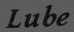

original image width:82, height:31
target_img_size:(84, 32)
display img shape:(84, 32, 3)
label:Spencerian


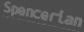

original image width:115, height:31
target_img_size:(100, 32)
display img shape:(100, 32, 3)
label:accommodatingly


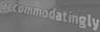

original image width:140, height:31
target_img_size:(100, 32)
display img shape:(100, 32, 3)
label:CARPENTER


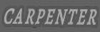

In [5]:
from IPython.display import display

# envÏóê Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¥
# lmdbÏóêÏÑú Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¨ Îïå envÎùºÎäî Î≥ÄÏàòÎ™ÖÏùÑ ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÏùºÎ∞òÏ†Å

env = lmdb.open(TRAIN_DATA_PATH, 
                max_readers=32, 
                readonly=True, 
                lock=False, 
                readahead=False, 
                meminit=False)

# Î∂àÎü¨Ïò® Îç∞Ïù¥ÌÑ∞Î•º txn(transaction)Ïù¥ÎûÄ Î≥ÄÏàòÎ•º ÌÜµÌï¥ ÏóΩÎãàÎã§
# Ïù¥Ï†ú txn Î≥ÄÏàòÎ•º ÌÜµÌï¥ ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞Ïóê Ï†ëÍ∑º Í∞ÄÎä•

with env.begin(write=False) as txn:
    for index in range(1, 5):
        # indexÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÎùºÎ≤® ÌÇ§ÏôÄ Ïù¥ÎØ∏ÏßÄ ÌÇ§Î•º ÎßåÎì§Î©¥
        # txnÏóêÏÑú ÎùºÎ≤®Í≥º Ïù¥ÎØ∏ÏßÄÎ•º ÏùΩÏñ¥Ïò¨ Ïàò ÏûàÏñ¥Ïöî
        label_key = 'label-%09d'.encode() % index
        label = txn.get(label_key).decode('utf-8')
        img_key = 'image-%09d'.encode() % index
        imgbuf = txn.get(img_key)
        buf = six.BytesIO()
        buf.write(imgbuf)
        buf.seek(0)

        # Ïù¥ÎØ∏ÏßÄÎäî Î≤ÑÌçºÎ•º ÌÜµÌï¥ ÏùΩÏñ¥Ïò¥
        # Î≤ÑÌçºÏóêÏÑú Ïù¥ÎØ∏ÏßÄÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ï ÌïÑÏöî
        try:
            img = Image.open(buf).convert('RGB')

        except IOError:
            img = Image.new('RGB', (100, 32))
            label = '-'

        # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌÅ¨Í∏∞Î•º Ï∂úÎ†•Ìï¥ Î¥ÖÎãàÎã§
        width, height = img.size
        print('original image width:{}, height:{}'.format(width, height))
        
        # Ïù¥ÎØ∏ÏßÄ ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎ©¥ÏÑú ÎÜíÏù¥Î•º 32Î°ú Î∞îÍøà
        # ÎÑàÎπÑÎäî 100Î≥¥Îã§ ÏûëÍ≤å Ïú†ÏßÄ
        target_width = min(int(width*32/height), 100)
        target_img_size = (target_width,32)        
        print('target_img_size:{}'.format(target_img_size))        
        img = np.array(img.resize(target_img_size)).transpose(1,0,2)

        # Ïù¥Ï†ú ÎÜíÏù¥Í∞Ä 32Î°ú ÏùºÏ†ïÌïú imageÏôÄ label Ìï®Íªò Ï∂úÎ†•     
        print('display img shape:{}'.format(img.shape))
        print('label:{}'.format(label))
        display(Image.fromarray(img.transpose(1,0,2).astype(np.uint8)))

ÎåÄÎ∂ÄÎ∂ÑÏùò Ïù¥ÎØ∏ÏßÄÎäî ÏµúÎåÄ 32ÍπåÏßÄÏùò heightÎ•º Í∞ÄÏßÄÍ≥† ÏûàÍ≥†, widthÎäî Î¨∏ÏûêÏó¥ Í∏∏Ïù¥Ïóê Îî∞Îùº Îã§Î•¥Í≤å ÎÇòÌÉÄÎÇ©ÎãàÎã§.

Ïù¥Ï†ú lmdbÎ•º ÌôúÏö©ÌïòÏó¨ keras model ÌïôÏäµÏö© MJStnth datasetÏùò classÎ•º Íµ¨ÌòÑÌïòÎ†§Í≥† Ìï©ÎãàÎã§.

- `dataset_path`Îäî ÏùΩÏñ¥Îì§Ïùº Îç∞Ïù¥ÌÑ∞ÏÖãÏùò Í≤ΩÎ°úÏûÖÎãàÎã§.
- `label_converter`Îäî ÏïÑÎûòÏóêÏÑú Î¨∏ÏûêÎ•º ÎØ∏Î¶¨ Ï†ïÏùòÎêú indexÎ°ú Î≥ÄÌôòÌï¥Ï£ºÎäî converterÎ°ú ÏßÅÏ†ë Íµ¨ÌòÑÌï† ÏòàÏ†ïÏûÖÎãàÎã§.
- `batch_size`ÏôÄ Input image ÌÅ¨Í∏∞, ÌïÑÌÑ∞ÎßÅÏùÑ ÏúÑÌïú ÏµúÎåÄ Í∏ÄÏûê Ïàò, ÌïôÏäµ ÎåÄÏÉÅÏúºÎ°ú ÌïúÏ†ïÌïòÍ∏∞ ÏúÑÌïú character Îì±ÏùÑ ÏûÖÎ†•ÏúºÎ°ú Î∞õÎèÑÎ°ù Íµ¨ÌòÑ ÎêòÏñ¥ ÏûàÏùå

In [6]:
class MJDatasetSequence(Sequence):
    # Í∞ùÏ≤¥Î•º Ï¥àÍ∏∞Ìôî Ìï† Îïå lmdbÎ•º Ïó¥Ïñ¥ envÏóê Ï§ÄÎπÑ
    # lmdbÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÏàòÎ•º ÎØ∏Î¶¨ ÌååÏïÖ
    def __init__(self, 
                 dataset_path,
                 label_converter,
                 batch_size=1,
                 img_size=(100,32),
                 max_text_len=22,
                 is_train=False,
                 character='') :
        
        self.label_converter = label_converter
        self.batch_size = batch_size
        self.img_size = img_size
        self.max_text_len = max_text_len
        self.character = character
        self.is_train = is_train
        self.divide_length = 100

        self.env = lmdb.open(dataset_path, max_readers=32, readonly=True, lock=False, readahead=False, meminit=False)
        with self.env.begin(write=False) as txn:
            self.num_samples = int(txn.get('num-samples'.encode()))
            self.index_list = [index + 1 for index in range(self.num_samples)]
        

    def __len__(self):
        return math.ceil(self.num_samples/self.batch_size/self.divide_length)
    
    # indexÏóê Ìï¥ÎãπÌïòÎäî imageÏôÄ labelÏùÑ ÏùΩÏñ¥ÏòµÎãàÎã§.
    # ÏúÑÏóêÏÑú ÏÇ¨Ïö©Ìïú ÏΩîÎìúÏôÄ Îß§Ïö∞ Ïú†ÏÇ¨
    # labelÏùÑ Ï°∞Í∏à Îçî Îã§Îì¨Îäî Í≤ÉÏù¥ Îã§Î¶Ñ
    def _get_img_label(self, index):
        with self.env.begin(write=False) as txn:
            label_key = 'label-%09d'.encode() % index
            label = txn.get(label_key).decode('utf-8')
            img_key = 'image-%09d'.encode() % index
            imgbuf = txn.get(img_key)

            buf = six.BytesIO()
            buf.write(imgbuf)
            buf.seek(0)
            try:
                img = Image.open(buf).convert('RGB')

            except IOError:
                img = Image.new('RGB', self.img_size)
                label = '-'
            width, height = img.size
            
            target_width = min(int(width*self.img_size[1]/height), self.img_size[0])
            target_img_size = (target_width, self.img_size[1])
            img = np.array(img.resize(target_img_size)).transpose(1,0,2)
            # labelÏùÑ ÏïΩÍ∞Ñ Îçî Îã§Îì¨ÏäµÎãàÎã§
            label = label.upper()
            out_of_char = f'[^{self.character}]'
            label = re.sub(out_of_char, '', label)
            label = label[:self.max_text_len]

        return (img, label)
    
    # __getitem__ ÏùÄ ÏïΩÏÜçÎêòÏñ¥ ÏûàÎäî Î©îÏÑúÎìúÏûÑ
    # Ïù¥ Î∂ÄÎ∂ÑÏùÑ ÏûëÏÑ±ÌïòÎ©¥ slice Ìï† Ïàò ÏûàÏùå
    # ÏûêÏÑ∏Ìïú ÎÇ¥Ïö© ÏïÑÎûò Î¨∏ÏÑú Ï∞∏Í≥†
    # https://docs.python.org/3/reference/datamodel.html#object.__getitem__
    #
    # 1. idxÏóê Ìï¥ÎãπÌïòÎäî index_listÎßåÌÅº Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨Ïò¥
    # 2. imageÏôÄ labelÏùÑ Î∂àÎü¨Ïò¥
    # 3. ÏÇ¨Ïö©ÌïòÍ∏∞ Ï¢ãÏùÄ inputsÍ≥º outputs ÌòïÌÉúÎ°ú Î∞òÌôòÌï®
    def __getitem__(self, idx):
        # 1.
        batch_indicies = self.index_list[
            idx*self.batch_size:
            (idx+1)*self.batch_size
        ]
        input_images = np.zeros([self.batch_size, *self.img_size, 3])
        labels = np.zeros([self.batch_size, self.max_text_len], dtype='int64')

        input_length = np.ones([self.batch_size], dtype='int64') * self.max_text_len
        label_length = np.ones([self.batch_size], dtype='int64')

        # 2.
        for i, index in enumerate(batch_indicies):
            img, label = self._get_img_label(index)
            encoded_label = self.label_converter.encode(label)
            # Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏóêÏÑú '-'Ïù¥ Ï∂îÍ∞ÄÎêòÎ©¥ max_text_lenÎ≥¥Îã§ Í∏∏Ïñ¥Ïßà Ïàò ÏûàÏñ¥Ïöî
            if len(encoded_label) > self.max_text_len:
                continue
            width = img.shape[0]
            input_images[i,:width,:,:] = img
            labels[i,0:len(encoded_label)] = encoded_label
            label_length[i] = len(encoded_label)
        
        # 3.
        inputs = {
            'input_image': input_images,
            'label': labels,
            'input_length': input_length,
            'label_length': label_length,
        }
        outputs = {'ctc': np.zeros([self.batch_size, 1])}

        return inputs, outputs

ÏúÑ Î∂ÑÏÑùÏΩîÎìúÏ≤òÎüº Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞Î•º img, labelÏùò ÏåçÏúºÎ°ú Í∞ÄÏ†∏Ïò§Îäî Î∂ÄÎ∂ÑÏùÄ `_get_img_label()` Î©îÏÜåÎìúÏóê Î∞òÏòÅÎê®. `model.fit()`ÏóêÏÑú Ìò∏Ï∂úÎêòÎäî `__getitem__()` Î©îÏÜåÎìúÏóêÏÑú Î∞∞Ïπò Îã®ÏúÑÎßåÌÅº `_get_img_label()`ÏùÑ ÌÜµÌï¥ Í∞ÄÏ†∏Ïò® datasetÏùÑ returnÌï®. `_get_img_label()`ÏùÑ Î≥¥Î©¥ Îã§ÏñëÌïú ÏÇ¨Ïù¥Ï¶àÏùò Ïù¥ÎØ∏ÏßÄÎ•º Î™®Îëê heightÎäî 32Î°ú ÎßûÏ∂îÍ≥†, widthÎäî ÏµúÎåÄ 100ÍπåÏßÄ ÎßûÏ∂§

# Recognition model (3) Encode

Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥ Î≥¥ÏïòÏùÑ Îïå, labelÏù¥ ÏùΩÏùÑ Ïàò ÏûàÎäî ÌèâÎ¨∏ textÎ°ú Ïù¥Î£®Ïñ¥Ï†∏ ÏûàÏóàÏùå. Í∑∏Îü¨ÎÇò Ïù¥Í≤ÉÏùÄ Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ∏∞ ÏúÑÌï¥ Ï†ÅÏ†àÌïú ÌòïÌÉúÍ∞Ä ÏïÑÎãò. Îî∞ÎùºÏÑú Í∞Å characterÏùÑ classÎ•º ÏÉùÍ∞ÅÌïòÍ≥† Ïù¥Î•º stepÏóê Îî∞Î•∏ class indexÎ°ú Î≥ÄÌôòÌï¥ÏÑú encodeÎ•º Ìï¥Ï£ºÏñ¥Ïïº Ìï®. Ïù¥Î•º Ìï¥Ï§Ñ Ïàò ÏûàÎäî `LabelConverter` ÌÅ¥ÎûòÏä§Î•º ÏûëÏÑ±.

- __init__()ÏóêÏÑúÎäî ÏûÖÎ†•ÏúºÎ°ú Î∞õÏùÄ textÎ•º `self.dict`Ïóê Í∞Å charactterÎì§Ïù¥ Ïñ¥Îñ§ indexÏóê Îß§ÌïëÎêòÎäîÏßÄ Ï†ÄÏû•. Ïù¥ characterÏôÄ index Ï†ïÎ≥¥Î•º ÌÜµÌï¥ Î™®Îç∏Ïù¥ ÌïôÏäµÌï† Ïàò ÏûàÎäî outputÏù¥ ÎßåÎì§Ïñ¥Ïßê. ÎßåÏïΩ character = 'ABCD'ÎùºÎ©¥ `'A'`Ïùò labelÏùÄ 1, `'B'`Ïùò labelÏùÄ 2Í∞Ä Îê®.
- Í≥µÎ∞±(blank) Î¨∏ÏûêÎ•º ÏßÄÏ†ï. Ïó¨Í∏∞ÏÑúÎäî Í≥µÎ∞± Î¨∏ÏûêÎ•º `'-'`ÏùÑ ÌôúÏö©ÌïòÏó¨ ÌëúÌòÑ, labelÏùÄ 0ÏúºÎ°ú ÏßÄÏ†ï
- decode()Îäî Í∞Å indexÎ•º Îã§Ïãú characterÎ°ú Î≥ÄÌôòÌïú ÌõÑ Ïù¥Ïñ¥Ï£ºÏñ¥ ÏùΩÏùÑ Ïàò ÏûàÎäî textÎ°ú Î∞îÍæ∏Ïñ¥Ï§å

> ÏûÖÎ†• Î∞õÏùÄ textÎ•º Î™®Îç∏Ïù¥ ÌïôÏäµÌï† Ïàò ÏûàÎäî labelÎ°ú ÎßåÎìúÎäî encode() Î©îÏÜåÎìúÎ•º Íµ¨ÌòÑÌï¥Ïïº Ìï®. Îã®, Í∞ôÏùÄ Í∏ÄÏûêÍ∞Ä Ïó∞ÏÜçÏúºÎ°ú Ïù¥Ïñ¥ÏßÄÎäî Í≤ΩÏö∞ Ïù¥Ïñ¥ÏßÄÎäî Í∑∏ ÏÇ¨Ïù¥Ïóê Í≥µÎ∞± Î¨∏ÏûêÏùò labelÏùÑ Ìè¨Ìï®Ìï¥Ïïº Ìï®

In [7]:
class LabelConverter(object):
    
    def __init__(self, character):
        self.character="-" + character
        self.label_map = dict()
        
        for i, char in enumerate(self.character):
            self.label_map[char]=i
            
    def encode(self, text):
        encoded_label = []
        for i, char in enumerate(text):
            if i > 0 and char == text[i-1]:
                encoded_label.append(0) # Í∞ôÏùÄ Î¨∏Ïûê ÏÇ¨Ïù¥Ïóê Í≥µÎ∞± Î¨∏Ïûê labelÏùÑ ÏÇΩÏûÖ
            encoded_label.append(self.label_map[char])    
        return np.array(encoded_label)
    
    def decode(self, encoded_label):
        target_characters = list(self.character)
        decoded_label = ""
        for encode in encoded_label:
            decoded_label += self.character[encode]
        return decoded_label
    
print("Ïäùüí®")

Ïäùüí®


In [8]:
# 'HELLO'Î•º EncodeÌïú ÌõÑ DecodeÍ∞Ä Ï†ïÏÉÅÏ†ÅÏúºÎ°ú ÎêòÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
label_converter = LabelConverter(TARGET_CHARACTERS)

encoded_text = label_converter.encode('HELLO')
print('Encoded_text:', encoded_text)
decoded_text = label_converter.decode(encoded_text)
print('Decoded_text:', decoded_text)

Encoded_text: [ 8  5 12  0 12 15]
Decoded_text: HEL-LO


ÎèôÏùºÌïú Í∏ÄÏûê 'L'Ïù¥ Ïó∞ÏÜçÎê† Îïå, Í∑∏ ÏÇ¨Ïù¥Ïóê Í≥µÎ∞± Î¨∏ÏûêÍ∞Ä Ìè¨Ìï®Îêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏùå

# Recognition model (4) Build CRNN model

ÏûÖÎ†•Í≥º Ï∂úÎ†•ÏùÑ Ï§ÄÎπÑÌñàÏúºÎãà Î™®Îç∏ÏùÑ ÎßåÎì§Í≤†ÏäµÎãàÎã§. KerasÏóêÏÑú Ï†úÍ≥µÌïòÎäî k.ctc_batch_cost()Î•º ÌôúÏö©Ìï¥ÏÑú losffÎ•º Í≥ÑÏÇ∞ÌïòÎèÑÎ°ù `ctc_lambda_func`Î•º ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÎßåÎì§Ïñ¥ÎëêÏóàÏäµÎãàÎã§.

In [9]:
def ctc_lambda_func(args): # CTC lossÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ ÏúÑÌïú Lambda Ìï®Ïàò
    labels, y_pred, label_length, input_length = args
    y_pred = y_pred[:, 2:, :]
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)

print("Ïäùüí®")

Ïäùüí®


`K.ctc_batch_cost()`Îäî kerasÏùò Ìï®ÏàòÏûÖÎãàÎã§. CTC Loss Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïòÍ∏∞ ÏúÑÌï¥ Ïñ¥Îñ§ Í∞íÏùÑ Ïù∏ÏûêÎ°ú Î∞õÏïÑÏïº ÌïòÎäîÏßÄ Î≥¥Í≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ÏûêÎ£å: [Tensorflow Tutorial - ctc_batch_cost](https://www.tensorflow.org/versions/r2.2/api_docs/python/tf/keras/backend/ctc_batch_cost)

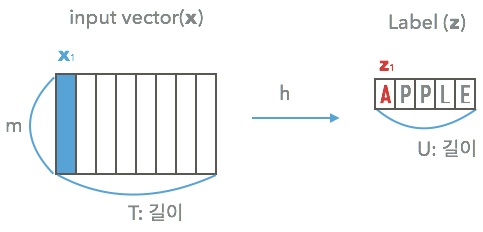

CTC LossÎäî ÏúÑ Í∑∏Î¶ºÍ≥º Í∞ôÏùÄ ÏÉÅÌô©ÏùÑ Îã§Î£πÎãàÎã§. ÏûÖÎ†•Ïùò Í∏∏Ïù¥ TÏôÄ ÎùºÎ≤®Ïùò Í∏∏Ïù¥ UÏôÄ ÏùºÏπòÌïòÏßÄ ÏïäÏùÑ Îïå, labelÏùÄ `APPLE`Ïù¥ÏßÄÎßå Î™®Îç∏Ïù¥ Ï∂úÎ†•Ìïú Í≤∞Í≥ºÎäî `AAAPPPPLLLLEE`Ï≤òÎüº ÎÇòÏò¨ Ïàò ÏûàÏùå. Ïù¥ ÏÉÅÌô©Ïù¥ Ïù¥ÎØ∏ÏßÄÏóêÏÑú ÌÖçÏä§Ìä∏ ÎùºÎ≤®ÏùÑ Ï∂îÎ°†Ìï¥Ïïº ÌïòÎäî Text recognition taskÏóê ÎèôÏùºÌïòÍ≤å Ï†ÅÏö©Îê®

> ÎßåÏïΩ Î™®Îç∏Ïù¥ AAAPPPPLLLLEEÏùÑ Ï∂úÎ†•ÌñàÎã§Î©¥, Ïù¥Îïå Ï∂îÎ°† Í≤∞Í≥ºÎäî APLEÏùºÏßÄ APPLEÏùºÏßÄ Íµ¨Î∂Ñ Î∂àÍ∞ÄÎä• -> Ïù¥ Í≤ΩÏö∞ÏóêÎäî APLEÎ°ú Í≤∞Î°†ÏùÑ ÎÇ¥Î¶¨Í≤å Îê®

> Í∑∏Îü¨ÎØÄÎ°ú Ï∂îÎ°† Í≤∞Í≥ºÍ∞Ä APPLEÏù¥ ÎêòÍ≤å ÌïòÎ†§Î©¥ Ïù¥ÎØ∏ÏßÄÏùò ÎùºÎ≤®ÏùÄ AP-PLEÎ°ú Î≥¥Ï†ïÌï¥ Ï£ºÏñ¥Ïïº Ìï®. Í∑∏ÎûòÏÑú Î™®Îç∏Ïù¥ AAAPP-PPLLLEEÎ°ú Ï∂úÎ†•ÏùÑ ÌïúÎã§Î©¥ Ï∂îÎ°† Í≤∞Í≥ºÎäî APPLEÏù¥ Îê®. Ïù¥ Ïù¥Ïú†Î°ú Ïù¥Ï†Ñ Ïä§ÌÖùÏóêÏÑú LabelConverter.encode() Î©îÏÜåÎìúÏóê Í≥µÎ∞±Î¨∏Ïûê Ï≤òÎ¶¨ Î°úÏßÅÏùÑ Ìè¨Ìï®ÌñàÏóàÏùå


ÏúÑ ÌÖêÏÑúÌîåÎ°úÏö∞ ÌäúÌÜ†Î¶¨ÏñºÏóê Îî∞Î•¥Î©¥, `K.ctc_batch_cost(y_true, y_pred, input_length, label_length)`ÏóêÎäî 4Í∞ÄÏßÄ Ïù∏ÏûêÍ∞Ä Ï°¥Ïû¨Ìï®.

- `y_true`: tensor (samples, max_string_length) containing the truth labels.
- `y_pred`: tensor (samples, time_steps, num_categories) containing the prediction, or output of the softmax.
- `input_length tensor`: (samples, 1) containing the sequence length for each batch item in y_pred.
- `label_length tensor`: (samples, 1) containing the sequence length for each batch item in y_true.

(Ïó¨Í∏∞ÏÑú samplesÎäî Î∞∞ÏπòÏÇ¨Ïù¥Ï¶àÎ•º ÏùòÎØ∏Ìï®)

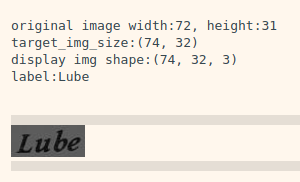

ÏúÑ Í∑∏Î¶ºÏùÄ Ïù¥Ï†ÑÏóê ÏÇ¥Ìé¥Î≥∏ datasetÏùò sampleÏûÑ. Ïù¥ ÏºÄÏù¥Ïä§Î•º ÏòàÎ°ú Îì§Î©¥ Ïù∏ÏûêÎäî

- `y_true`: Ïã§Ï†ú ÎùºÎ≤® `LUBE`. ÌÖçÏä§Ìä∏ ÎùºÎ≤® Í∑∏ÎåÄÎ°úÍ∞Ä ÏïÑÎãàÎùº Í∞Å Í∏ÄÏûêÎ•º one-hot encodingÌïú ÌòïÌÉú. max_string_length Í∞íÏùÄ Î™®Îç∏ÏóêÏÑú 22Î°ú ÏßÄÏ†ï
- `y_pred`: RCNN `Î™®Îç∏Ïùò Ï∂úÎ†• Í≤∞Í≥º`. Í∏∏Ïù¥Îäî 4Í∞Ä ÏïÑÎãàÎùº RNNÏùò ÏµúÏ¢Ö Ï∂úÎ†• Í∏∏Ïù¥Î°úÏÑú 24Í∞Ä Îê† ÏòàÏ†ï
- `input_length tensor`: Î™®Îç∏ ÏûÖÎ†• Í∏∏Ïù¥ TÎ°úÏÑú, ÌÖçÏä§Ìä∏Ïùò widthÏù∏ `74`
- `label_length tensor`: labelÏùò Ïã§Ï†ú Ï†ïÎãµ Í∏∏Ïù¥ UÎ°úÏÑú, `4`Í∞Ä Îê®

In [10]:
# K.ctc_batch_cost()Î•º ÌôúÏö©ÌïòÏó¨
# image_inputÏùÑ ÏûÖÎ†•, ÎßàÏßÄÎßâ LabelÏùÑ 'output'ÏúºÎ°ú Ï∂úÎ†•ÌïòÎäî layerÎ•º Í∞ñÎèÑÎ°ù
# Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Ìï®Ïàò build_crnn_model()ÏùÑ Íµ¨ÌòÑ


def build_crnn_model(input_shape=(100,32,3), characters=TARGET_CHARACTERS):
    num_chars = len(characters)+2
    image_input = layers.Input(shape=input_shape, dtype='float32', name='input_image')
    
    # Build CRNN model
    conv = layers.Conv2D(64, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(image_input)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(128, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(2, 2))(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.Conv2D(256, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.Conv2D(512, (3, 3), activation='relu', padding='same', kernel_initializer='he_normal')(conv)
    conv = layers.BatchNormalization()(conv)
    conv = layers.MaxPooling2D(pool_size=(1, 2))(conv)     
    feature = layers.Conv2D(512, (2, 2), activation='relu', kernel_initializer='he_normal')(conv)
    sequnce = layers.Reshape(target_shape=(24, 512))(feature)
    sequnce = layers.Dense(64, activation='relu')(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    sequnce = layers.Bidirectional(layers.LSTM(256, return_sequences=True))(sequnce)
    y_pred = layers.Dense(num_chars, activation='softmax', name='output')(sequnce)

    labels = layers.Input(shape=[22], dtype='int64', name='label')
    input_length = layers.Input(shape=[1], dtype='int64', name='input_length')
    label_length = layers.Input(shape=[1], dtype='int64', name='label_length')
    loss_out = layers.Lambda(ctc_lambda_func, output_shape=(1,), name="ctc")(
        [labels, y_pred, label_length, input_length]
    )
    model_input = [image_input, labels, input_length, label_length]
    model = Model(
        inputs=model_input,
        outputs=loss_out
    )
    return model

print("Ïäùüí®")

Ïäùüí®


# Recognition model (5) Train & Inference

In [11]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î™®Îç∏ÏùÑ Ï§ÄÎπÑÌï©ÎãàÎã§
train_set = MJDatasetSequence(TRAIN_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS, is_train=True)
val_set = MJDatasetSequence(VALID_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS)
model = build_crnn_model()

# Î™®Îç∏ÏùÑ Ïª¥ÌååÏùº Ìï©ÎãàÎã§
optimizer = tf.keras.optimizers.Adadelta(lr=0.1, clipnorm=5)
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}, optimizer=optimizer)

In [12]:
# ÌõàÎ†®Ïù¥ Îπ®Î¶¨ ÎÅùÎÇ† Ïàò ÏûàÎèÑÎ°ù ModelCheckPointÏôÄ EarlyStoppingÏùÑ ÏÇ¨Ïö©Ìï©ÎãàÎã§
checkpoint_path = HOME_DIR + '/model_checkpoint.hdf5'

ckp = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path, monitor='val_loss',
    verbose=1, save_best_only=True, save_weights_only=True
)
earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='min'
)
model.fit(train_set,
          steps_per_epoch=len(train_set),
          epochs=100,
          validation_data=val_set,
          validation_steps=len(val_set),
          callbacks=[ckp, earlystop])

Epoch 1/100
565/565 [==============================] - 183s 283ms/step - loss: 27.5233 - val_loss: 23.7420

Epoch 00001: val_loss improved from inf to 23.74205, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 2/100
565/565 [==============================] - 156s 277ms/step - loss: 18.9328 - val_loss: 9.1653

Epoch 00002: val_loss improved from 23.74205 to 9.16527, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 3/100
565/565 [==============================] - 157s 278ms/step - loss: 7.9014 - val_loss: 6.4984

Epoch 00003: val_loss improved from 9.16527 to 6.49842, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 4/100
565/565 [==============================] - 157s 278ms/step - loss: 5.3701 - val_loss: 5.3359

Epoch 00004: val_loss improved from 6.49842 to 5.33590, saving model to /aiffel/aiffel/ocr/model_checkpoint.hdf5
Epoch 5/100
565/565 [==============================] - 158s 279ms/step - loss: 4.1815 - val_loss: 5.1199

Epoch 00005: val_

In [13]:
# Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§
test_set = MJDatasetSequence(TEST_DATA_PATH, label_converter, batch_size=BATCH_SIZE, character=TARGET_CHARACTERS)
model = build_crnn_model()
model.load_weights(checkpoint_path)

# crnn Î™®Îç∏ÏùÄ ÏûÖÎ†•Ïù¥ Î≥µÏû°Ìïú Íµ¨Ï°∞Ïù¥ÎØÄÎ°ú Í∑∏ÎåÄÎ°ú ÏÇ¨Ïö©Ìï† ÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§
# Í∑∏ÎûòÏÑú crnn Î™®Îç∏Ïùò ÏûÖÎ†•Ï§ë 'input_image' Î∂ÄÎ∂ÑÎßå ÏÇ¨Ïö©Ìïú Î™®Îç∏ÏùÑ ÏÉàÎ°ú ÎßåÎì§Í≤ÅÎãàÎã§
# inference Ï†ÑÏö© Î™®Îç∏Ïù¥ÏóêÏöî 
input_data = model.get_layer('input_image').output
y_pred = model.get_layer('output').output
model_pred = Model(inputs=input_data, outputs=y_pred)

Result: 	 SLINKING9999999999999999


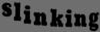

Result: 	 ALEPPO99999999999999999


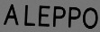

Result: 	 RWONDA999999999999999999


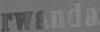

Result: 	 NATHANS99999999999999999


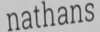

Result: 	 HALLO999999999999999999


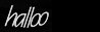

Result: 	 HUERLS999999999999999999


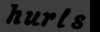

Result: 	 DOWNSIZE9999999999999999


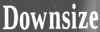

Result: 	 ROBOTIC99999999999999999


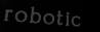

Result: 	 STOPPY99999999999999999


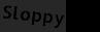

Result: 	 HERMITE99999999999999999


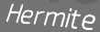

In [14]:
from IPython.display import display

# Î™®Îç∏Ïù¥ inferenceÌïú Í≤∞Í≥ºÎ•º Í∏ÄÏûêÎ°ú Î∞îÍøîÏ£ºÎäî Ïó≠Ìï†ÏùÑ Ìï©ÎãàÎã§
# ÏΩîÎìú ÌïòÎÇòÌïòÎÇòÎ•º Ïù¥Ìï¥ÌïòÍ∏∞Îäî Ï°∞Í∏à Ïñ¥Î†§Ïö∏ Ïàò ÏûàÏäµÎãàÎã§
def decode_predict_ctc(out, chars = TARGET_CHARACTERS):
    results = []
    indexes = K.get_value(
        K.ctc_decode(
            out, input_length=np.ones(out.shape[0]) * out.shape[1],
            greedy=False , beam_width=5, top_paths=1
        )[0][0]
    )[0]
    text = ""
    for index in indexes:
        text += chars[index]
    results.append(text)
    return results

# Î™®Îç∏Í≥º Îç∞Ïù¥ÌÑ∞ÏÖãÏù¥ Ï£ºÏñ¥ÏßÄÎ©¥ inferenceÎ•º ÏàòÌñâÌï©ÎãàÎã§
# indexÍ∞ú ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏùΩÏñ¥ Î™®Îç∏Î°ú inferenceÎ•º ÏàòÌñâÌïòÍ≥†
# Í≤∞Í≥ºÎ•º ÎîîÏΩîÎî©Ìï¥ Ï∂úÎ†•Ìï¥Ï§çÎãàÎã§
def check_inference(model, dataset, index = 5):
    for i in range(index):
        inputs, outputs = dataset[i]
        img = dataset[i][0]['input_image'][0:1,:,:,:]
        output = model.predict(img)
        result = decode_predict_ctc(output, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
        print("Result: \t", result)
        display(Image.fromarray(img[0].transpose(1,0,2).astype(np.uint8)))

check_inference(model_pred, test_set, index=10)

# ÌîÑÎ°úÏ†ùÌä∏: End-to-End OCR

- `detect_text`: Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°úÎ•º Î∞õÏïÑ Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄ ÎÇ¥Ïùò Î¨∏ÏûêÎ•º Ï∞æÏïÑÎÇ¥Îäî Ìï®Ïàò `detect_text`Î•º keras-ocrÏùò DetectorÎ•º Ïù¥Ïö©Ìï¥ÏÑú ÎßåÎì¶
- `inference`Ìïú ÌõÑ, ÏãúÍ∞ÅÌôîÌïòÏó¨ Îã®Ïñ¥Ïùò ÏòÅÏó≠ÏùÑ ÏûêÎ•º Ïàò ÏûàÎèÑÎ°ù Ìï®

In [27]:
import cv2
import matplotlib.pyplot as plt
from keras_ocr.detection import Detector

SAMPLE_IMG_PATH = os.path.join(HOME_DIR+'/data/', 'sample.jpg')

detector = Detector()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5


In [35]:
def detect_text(img_path):
    # Î∞∞Ïπò ÌÅ¨Í∏∞Î•º ÏúÑÌï¥ÏÑú dimensionÏùÑ ÌôïÏû•Ìï¥Ï£ºÍ≥† kera-ocrÏùò ÏûÖÎ†• Ï∞®ÏõêÏóê ÎßûÍ≤å H,W,CÎ°ú Î≥ÄÍ≤ΩÌï©ÎãàÎã§.
    # Î∞∞ÏπòÏùò Ï≤´ Î≤àÏß∏ Í≤∞Í≥ºÎßå Í∞ÄÏ†∏ÏòµÎãàÎã§.
    # ÏãúÍ∞ÅÌôîÎ•º ÏúÑÌï¥ÏÑú xÏôÄ yÏ¢åÌëúÎ•º Î≥ÄÍ≤ΩÌï¥Ï§çÎãàÎã§. (ÏïûÏÑ† h dimensionÏúºÎ°ú Ïù∏Ìï¥ y,xÎ°ú ÌëúÍ∏∞Îê®)
    img = cv2.imread(img_path)
    line_img = img.copy()
    input_img = img[tf.newaxis,...]
    result = detector.detect(input_img)
    ocr_result = result[0]
    
    cropped_imgs = []
    for text_result in ocr_result:
        for i in range(4):
            if i==3:
                line_img = cv2.line(line_img,tuple(text_result[3]),tuple(text_result[0]),(0,0,255),10)
            else:
                line_img = cv2.line(line_img,tuple(text_result[i]),tuple(text_result[i+1]),(0,0,255),10)
        
        x_min = text_result[:,0].min() - 5
        x_max = text_result[:,0].max() + 5
        y_min = text_result[:,1].min() - 5
        y_max = text_result[:,1].max() + 5
        cropped_imgs.append(img[int(y_min):int(y_max),int(x_min):int(x_max)])
    
    return line_img, cropped_imgs

In [36]:
def recognize_img(input_img, input_img_size=(100,32)):
    # ÏûòÎ†§ÏßÑ Îã®Ïñ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïù∏ÏãùÌïòÎäî ÏΩîÎìú
    img = input_img[:,:,::-1]
    img = cv2.resize(img, input_img_size)
    result_img = img.copy()
    img = img.transpose(1,0,2)
    img = img[tf.newaxis,...]
    output = model_pred.predict(img)
    result = decode_predict_ctc(output, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
    print("Result: \t", result)
    display(Image.fromarray(result_img.astype(np.uint8)))

In [37]:
img_pil, cropped_img = detect_text(SAMPLE_IMG_PATH)
display(img_pil)

array([[[209, 214, 213],
        [206, 211, 210],
        [202, 207, 206],
        ...,
        [178, 182, 187],
        [178, 182, 187],
        [181, 185, 190]],

       [[184, 189, 188],
        [183, 188, 187],
        [181, 186, 185],
        ...,
        [178, 182, 187],
        [177, 181, 186],
        [178, 182, 187]],

       [[171, 176, 175],
        [171, 176, 175],
        [172, 177, 176],
        ...,
        [179, 183, 188],
        [180, 184, 189],
        [183, 187, 192]],

       ...,

       [[103,  77,  60],
        [105,  79,  62],
        [106,  80,  63],
        ...,
        [101,  73,  56],
        [102,  74,  57],
        [102,  74,  57]],

       [[104,  78,  61],
        [105,  79,  62],
        [107,  81,  64],
        ...,
        [102,  74,  57],
        [103,  75,  58],
        [103,  75,  58]],

       [[103,  77,  60],
        [105,  79,  62],
        [107,  81,  64],
        ...,
        [102,  74,  57],
        [103,  75,  58],
        [104,  76,  59]]

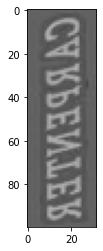

In [38]:
plt.imshow(img[:,:,::-1])

In [39]:
def recognize_img(input_img, input_img_size=(100,32)):
    # ÏûòÎ†§ÏßÑ Îã®Ïñ¥ Ïù¥ÎØ∏ÏßÄÎ•º Ïù∏ÏãùÌïòÎäî ÏΩîÎìú
    img = input_img[:,:,::-1]
    img = cv2.resize(img, input_img_size)
    result_img = img.copy()
    img = img.transpose(1,0,2)
    img = img[tf.newaxis,...]
    output = model_pred.predict(img)
    result = decode_predict_ctc(output, chars="-"+TARGET_CHARACTERS)[0].replace('-','')
    print("Result: \t", result)
    display(Image.fromarray(result_img.astype(np.uint8)))

Result: 	 REREIN99999999999999999


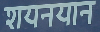

Result: 	 SLEEPER9999999999999999


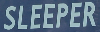

In [40]:
for _img in cropped_img:
    recognize_img(_img)

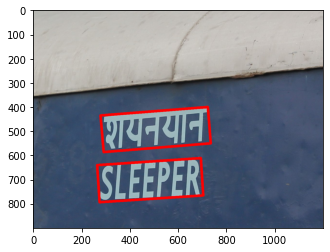

In [46]:
SAMPLE_IMG_PATH = os.path.join(HOME_DIR+'/data/', 'sample.jpg')
img, cropped_img = detect_text(SAMPLE_IMG_PATH)
plt.imshow(img[:,:,::-1])

Result: 	 REREIN99999999999999999


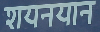

Result: 	 SLEEPER9999999999999999


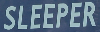

In [44]:
for _img in cropped_img:
    recognize_img(_img)

# ÌîÑÎ°úÏ†ùÌä∏ Ï†ïÎ¶¨
- Î™®Îç∏ Ï∂îÎ°† Í≤∞Í≥ºÎ•º ÌôïÏù∏Ìï¥Î≥¥Îãà ÏòÅÏñ¥Îäî ÎåÄÎ∂ÄÎ∂Ñ Ï†ïÌôïÌïòÍ≤å Ïù∏ÏãùÎêòÏóàÏùå
- 'sample1' ÌÖåÏä§Ìä∏ Í≤∞Í≥º, text detectionÍ≥º recognitionÏù¥ Ïûò ÎêòÏóàÏùå
- Í∞ÅÎèÑÍ∞Ä Î≥ÄÍ≤ΩÎêú Ïù¥ÎØ∏ÏßÄÏùò Í≤ΩÏö∞ text detectionÏùÄ Ïûò ÎêòÏßÄÎßå recognitionÏù¥ Ïûò Ïïà ÎêòÎäî Í≤∞Í≥ºÎ•º Î≥º Ïàò ÏûàÏóàÏùå
- Î¨∏Ïûê Îí§Ïóê ÎÇòÏò§Îäî Í≥µÎ∞±Ïù¥ `9999999...`Î°ú ÎÇòÏò§Îäî Î¨∏Ï†úÏ†êÏùÑ Ìï¥Í≤∞ÌïòÏßÄ Î™ªÌï®